# Bank data analysis



The goal of your project is to create a robust classifier and use the data, with the help of which you will build a model that will recognize whether specific client will subscribe to a long term bank deposit (Binary classification).  


The first part of the analysis is visualization and display of data in order to be able to make better statistical and descriptive analysis.

An exploratory data analysis or EDA is often the first thing we do to introduce ourselves to a new dataset. It is performed to make general observations about the data, summarize it, explore some basic trends or uncover hidden relations between variables. Data visualisation can help us to better navigate in the new data and present EDA findings. In this part of project we want to add some value of the dataset that we need to analyze.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import pandas.plotting
import math
%matplotlib inline

In [ ]:
import time

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import VotingClassifier
from scipy.stats import randint as sp_randint
import datetime


# Read data, visualize, basic statistics, understand it

In [8]:
#read data
data = pd.read_csv("bank-additional-full.csv", sep=';')  
# visualize the data
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [10]:
# data statistics
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [16]:
data['y'].value_counts(normalize=True)

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

This shows that this is an unbalanced problem.

In [18]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','day_of_week', 'poutcome']
numerical = [x for x in data.columns.to_list() if x not in categorical]
numerical.remove('y')

In [20]:
print('Categorical features:', categorical)
print('Numerical features:', numerical)

Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Numerical features: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [28]:
sns.countplot(X=data['y'], palette="Set3")
plt.title('Distribution of classes')
plt.xlabel('Target class')

Text(0.5, 23.52222222222222, 'Target class')

# Exploratory Data Analysis

to understand the data it is necessary to make a good visualization

#### pdays

In [30]:
data.pdays.describe()

count    41188.000000
mean       962.475454
std        186.910907
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

In [32]:
data.drop(columns=['pdays'],inplace = True)

#### age

C:\Users\salma\AppData\Local\Temp\ipykernel_28156\1525899248.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="y", y="age", palette="Set3")


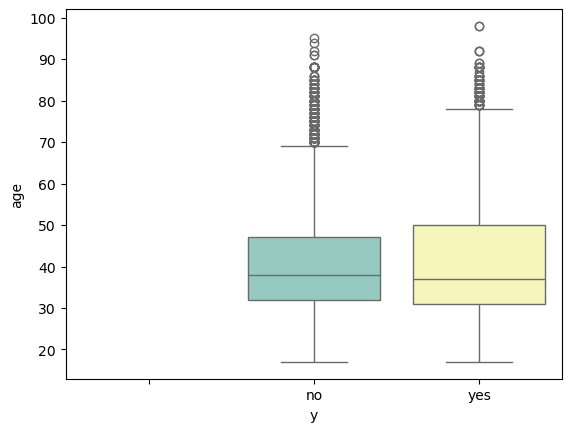

In [39]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="age", palette="Set3")
plt.show()

From the above boxplot we know that for both the customers that subscibed or didn't subscribe a term deposit, has a median age of around 38-40. And the boxplot for both the classes overlap quite a lot, which means that age isn't necessarily a good indicator for which customer will subscribe and which customer will not.

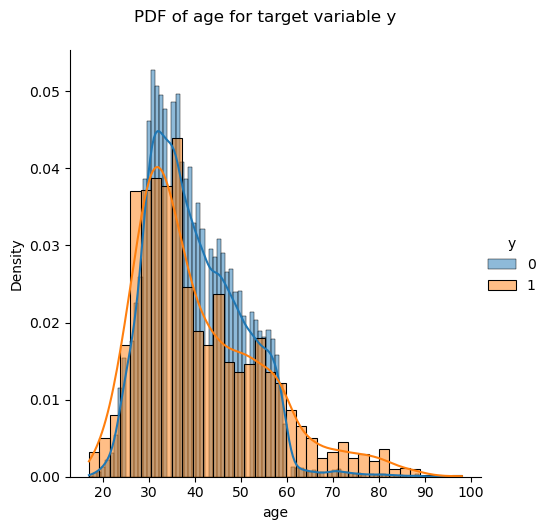

In [79]:
g = sns.FacetGrid(data, hue='y', height=5)
g.map(sns.histplot, 'age', stat='density', kde=True)
g.add_legend()
plt.suptitle('PDF of age for target variable y', y=1.05)
plt.show()


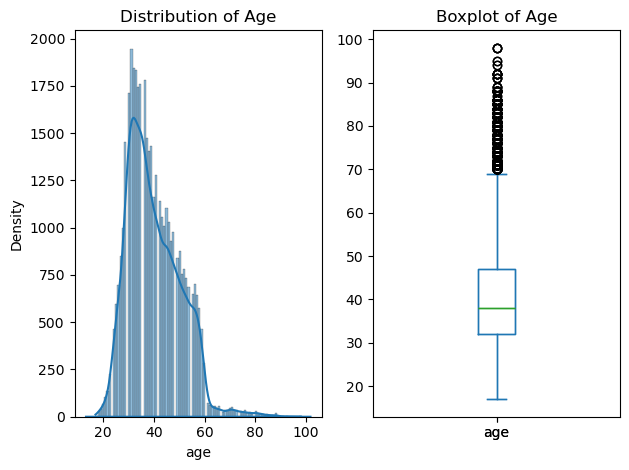

In [83]:

plt.figure(1, figsize=(12, 5))  # optional: wider figure for better layout

# Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(data['age'], kde=True)
plt.title('Distribution of Age')

# Boxplot
plt.subplot(1, 2, 2)
data['age'].plot.box()
plt.title('Boxplot of Age')

plt.tight_layout()  # optional: for neat spacing
plt.show()


In [85]:
lst = [data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 30
    column.loc[(column["age"] >= 30) & (column["age"] <= 44), 'age_group'] = 40
    column.loc[(column["age"] >= 45) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [87]:
count_age_response_pct = pd.crosstab(data['y'],data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()

In [89]:
sns.countplot(x='age_group', data=data, hue='y', palette="Set3")

<Axes: xlabel='age_group', ylabel='count'>

This graph indicates that the bank was focused on the 30s aged group(red bar), but this group has lower subscription rates(green bar) compared to the others aged groups.The bank was more effective with 20s and 60s aged group, which should be the next target. Considering that the term deposits are the most liquid and the most secure investment, the pattern is expected.The oldest aged group want to have cash and youngest do not have experience, knowledge and enough money for better and more sophisticated investments. On other hand, the 30s aged group have more loans and less money for savings.

#### duration

C:\Users\salma\AppData\Local\Temp\ipykernel_28156\2027837379.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="y", y="duration", palette="Set3")


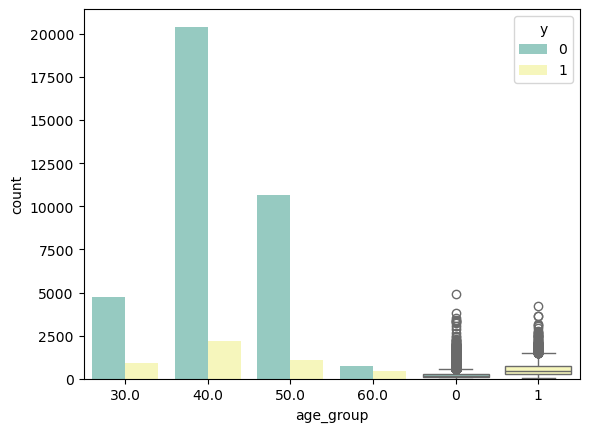

In [94]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="duration", palette="Set3")
plt.show()

From the above plot it is clear that, the duration (last contact duration) of a customer can be useful for predicting the target variable. It is expected because it is already mentioned in the data overview that this field highely affects the target variable and should only be used for benchmark purposes.

C:\Users\salma\AppData\Local\Temp\ipykernel_28156\3551359958.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="y", y="cons.conf.idx", palette="Set3")


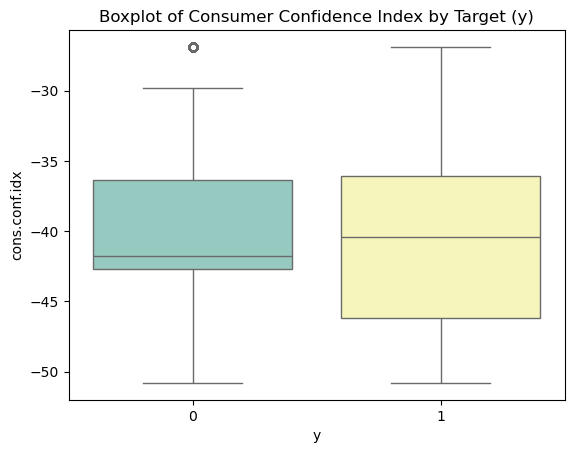

In [99]:
%matplotlib inline

sns.boxplot(data=data, x="y", y="cons.conf.idx", palette="Set3")
plt.title("Boxplot of Consumer Confidence Index by Target (y)")
plt.show()


### Correlation matrix of numerical features

In [101]:
#Change 'day' from words to numbers for easier analysis
#"mon","tue","wed","thu","fri"
lst = [data]
for column in lst:
    column.loc[column["day_of_week"] == "mon", "day_int"] = 1
    column.loc[column["day_of_week"] == "tue", "day_int"] = 2
    column.loc[column["day_of_week"] == "wed", "day_int"] = 3
    column.loc[column["day_of_week"] == "thu", "day_int"] = 4
    column.loc[column["day_of_week"] == "fri", "day_int"] = 5
    

In [103]:
lst = [data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [105]:
count_age_y = pd.crosstab(data['y'],data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_y = count_age_y.transpose()

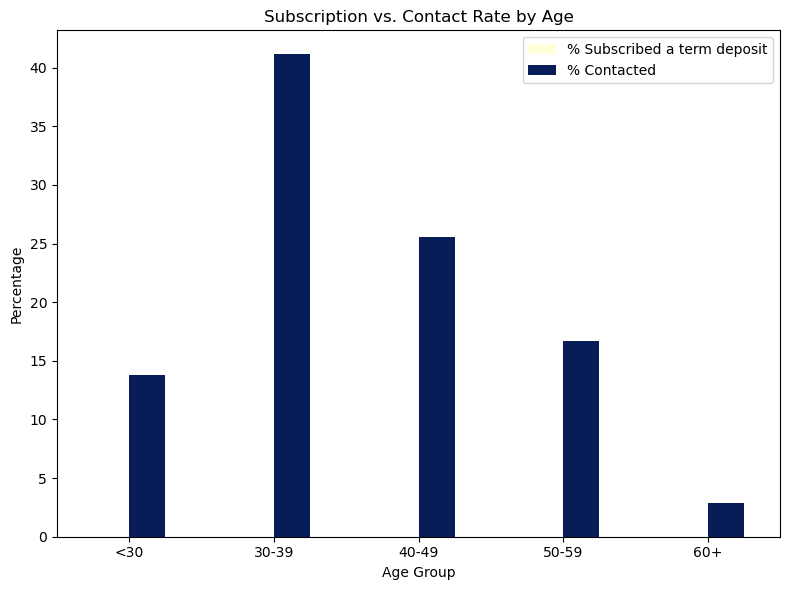

In [111]:
# Count of each age group
age = pd.DataFrame(data['age_group'].value_counts().sort_index())
age.rename(columns={'age_group': 'count'}, inplace=True)

# % Contacted
age['% Contacted'] = age['count'] * 100 / age['count'].sum()

# Assuming you already calculated this:
# count_age_y = data[data['y'] == 'yes']['age_group'].value_counts().sort_index()

# If not:
count_age_y = data[data['y'] == 'yes']['age_group'].value_counts().sort_index()

# % Subscribed
age['% Subscribed a term deposit'] = count_age_y * 100 / age['count']

# Add numerical age for sorting
age['age'] = [20, 30, 40, 50, 60]  # Must match order of index!

# Sort by age
age = age.sort_values('age')

# Plot
plot_age = age[['% Subscribed a term deposit', '% Contacted']].plot(
    kind='bar', figsize=(8,6), cmap='YlGnBu')

plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.xticks(np.arange(5), ['<30', '30-39', '40-49', '50-59', '60+'], rotation='horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.tight_layout()
plt.show()


In [113]:
def drawheatmap(df):
    matrix = data.corr()
    f, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(matrix, vmax=.8, square=True, cmap='YlGnBu', ax=ax, annot=True, linewidth=0.1)

In [115]:
drawheatmap(data)

From the above heatmap we can see that there are some numerical features which share a high correlation between them, e.g nr.employed and euribor3m these features share a correlation value of 0.95, and euribor3m and emp.var.rate share a correlation of 0.97, which is very high compared to the other features that we see in the heatmap.

In [122]:
# Clean column names (remove spaces and lowercase)
data.columns = data.columns.str.strip()

# Check if 'y' column exists
if 'y' in data.columns:
    if data['y'].dtype == 'object':
        data['y'] = data['y'].str.strip().str.lower()
        data['y'] = data['y'].replace({'no': 0, 'yes': 1})
else:
    print("Column 'y' not found in DataFrame!")


In [124]:
Mean_encoded_job = data.groupby(['job'])['y'].mean().to_dict()   
data['job'] =  data['job'].map(Mean_encoded_job)  

Mean_encoded_marital = data.groupby(['marital'])['y'].mean().to_dict()   
data['marital'] =  data['marital'].map(Mean_encoded_marital) 

Mean_encoded_default = data.groupby(['default'])['y'].mean().to_dict()   
data['default'] =  data['default'].map(Mean_encoded_default)

Mean_encoded_housing = data.groupby(['housing'])['y'].mean().to_dict()   
data['housing'] =  data['housing'].map(Mean_encoded_housing)

Mean_encoded_loan = data.groupby(['loan'])['y'].mean().to_dict()   
data['loan'] =  data['loan'].map(Mean_encoded_loan)

Mean_encoded_contact = data.groupby(['contact'])['y'].mean().to_dict()   
data['contact'] =  data['contact'].map(Mean_encoded_contact)

Mean_encoded_month = data.groupby(['month'])['y'].mean().to_dict()   
data['month'] =  data['month'].map(Mean_encoded_month)

Mean_encoded_poutcome = data.groupby(['poutcome'])['y'].mean().to_dict()   
data['poutcome'] =  data['poutcome'].map(Mean_encoded_poutcome)

Mean_encoded_day_of_week = data.groupby(['day_of_week'])['y'].mean().to_dict()   
data['day_of_week'] =  data['day_of_week'].map(Mean_encoded_day_of_week)

Mean_encoded_education = data.groupby(['education'])['y'].mean().to_dict()   
data['education'] =  data['education'].map(Mean_encoded_education)

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  float64
 2   marital         41188 non-null  float64
 3   education       41188 non-null  float64
 4   default         41188 non-null  float64
 5   housing         41188 non-null  float64
 6   loan            41188 non-null  float64
 7   contact         41188 non-null  float64
 8   month           41188 non-null  float64
 9   day_of_week     41188 non-null  float64
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  float64
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [128]:
#data_drop
data_drop = pd.DataFrame()
data_drop = data

# Feature Importance

In [152]:
# Using Random Forest to gain an insight on Feature Importance

clf = RandomForestClassifier()
clf.fit(data_drop.drop('y', axis=1), data_drop['y'])

sns.set_style("whitegrid")
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=data_drop.drop('y', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));

In [154]:
data_drop.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
day_int           0
age_group         0
dtype: int64

# PCA

In [159]:
# Calculating PCA for both datasets, and graphing the Variance for each feature, per dataset

std_scale = preprocessing.StandardScaler().fit(data_drop.drop('y', axis=1))
X = std_scale.transform(data_drop.drop('y', axis=1))
pca1 = PCA(n_components=len(data_drop.columns)-1)
fit1 = pca1.fit(X)

std_scale = preprocessing.StandardScaler().fit(data_drop.drop('y', axis=1))
X = std_scale.transform(data_drop.drop('y', axis=1))
pca2 = PCA(n_components=len(data_drop.columns)-2)
fit2 = pca2.fit(X)

# Graphing the variance per feature
sns.set_style("whitegrid")
plt.figure(figsize=(25,7)) 

plt.subplot(1, 2, 1)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for Discretised Dataset')
plt.bar(range(0, fit1.explained_variance_ratio_.size), fit1.explained_variance_ratio_);

plt.subplot(1, 2, 2)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for Continuous Dataset')
plt.bar(range(0, fit2.explained_variance_ratio_.size), fit2.explained_variance_ratio_);

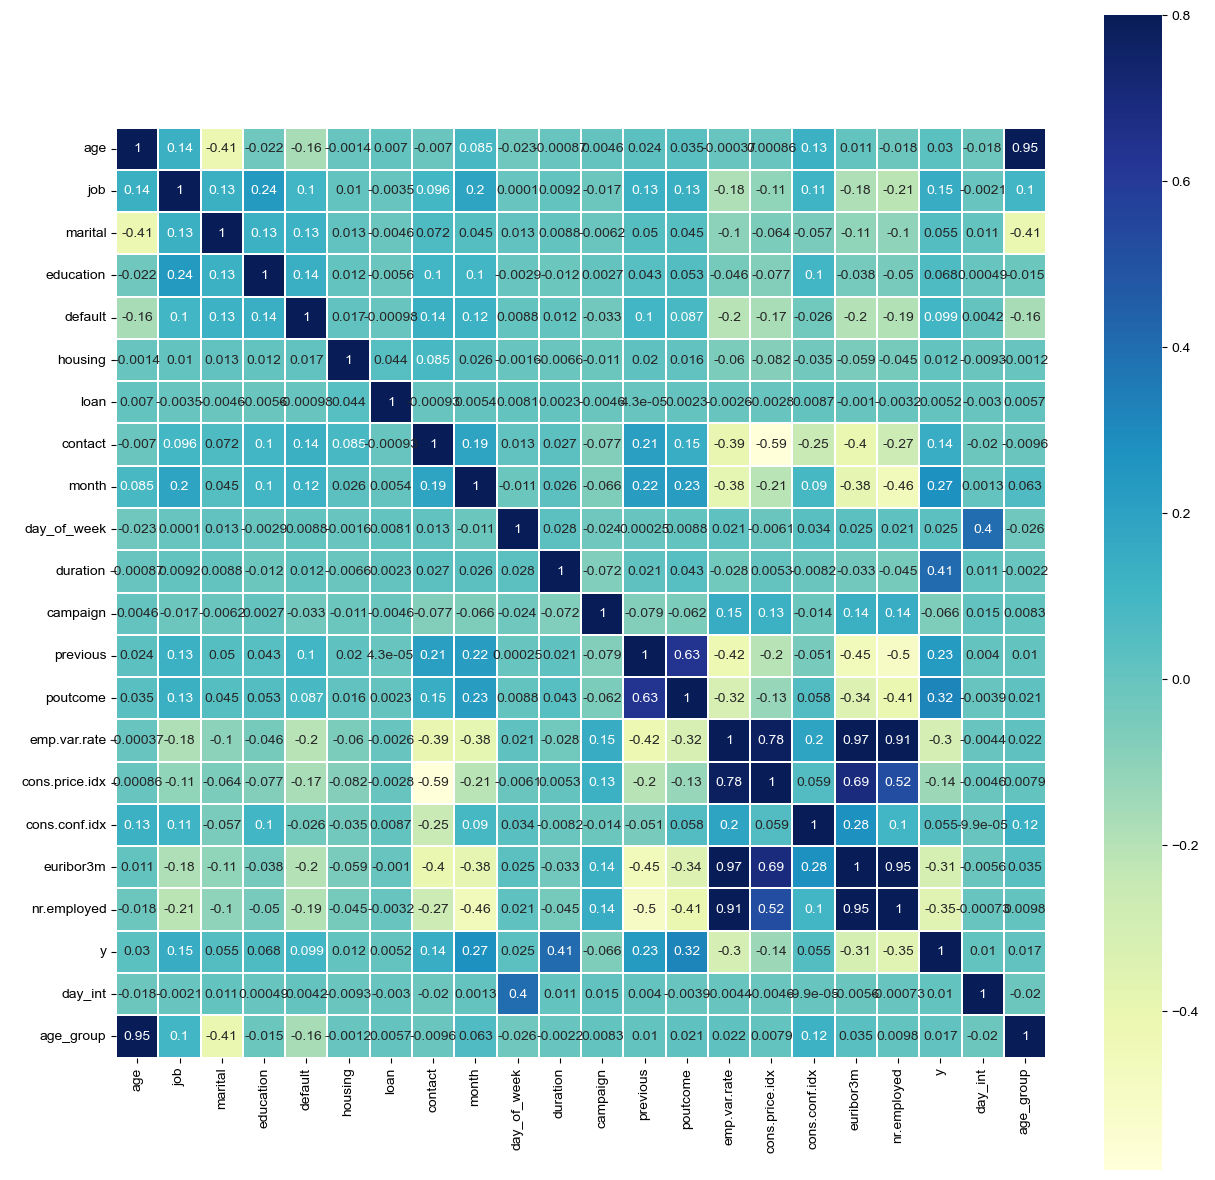

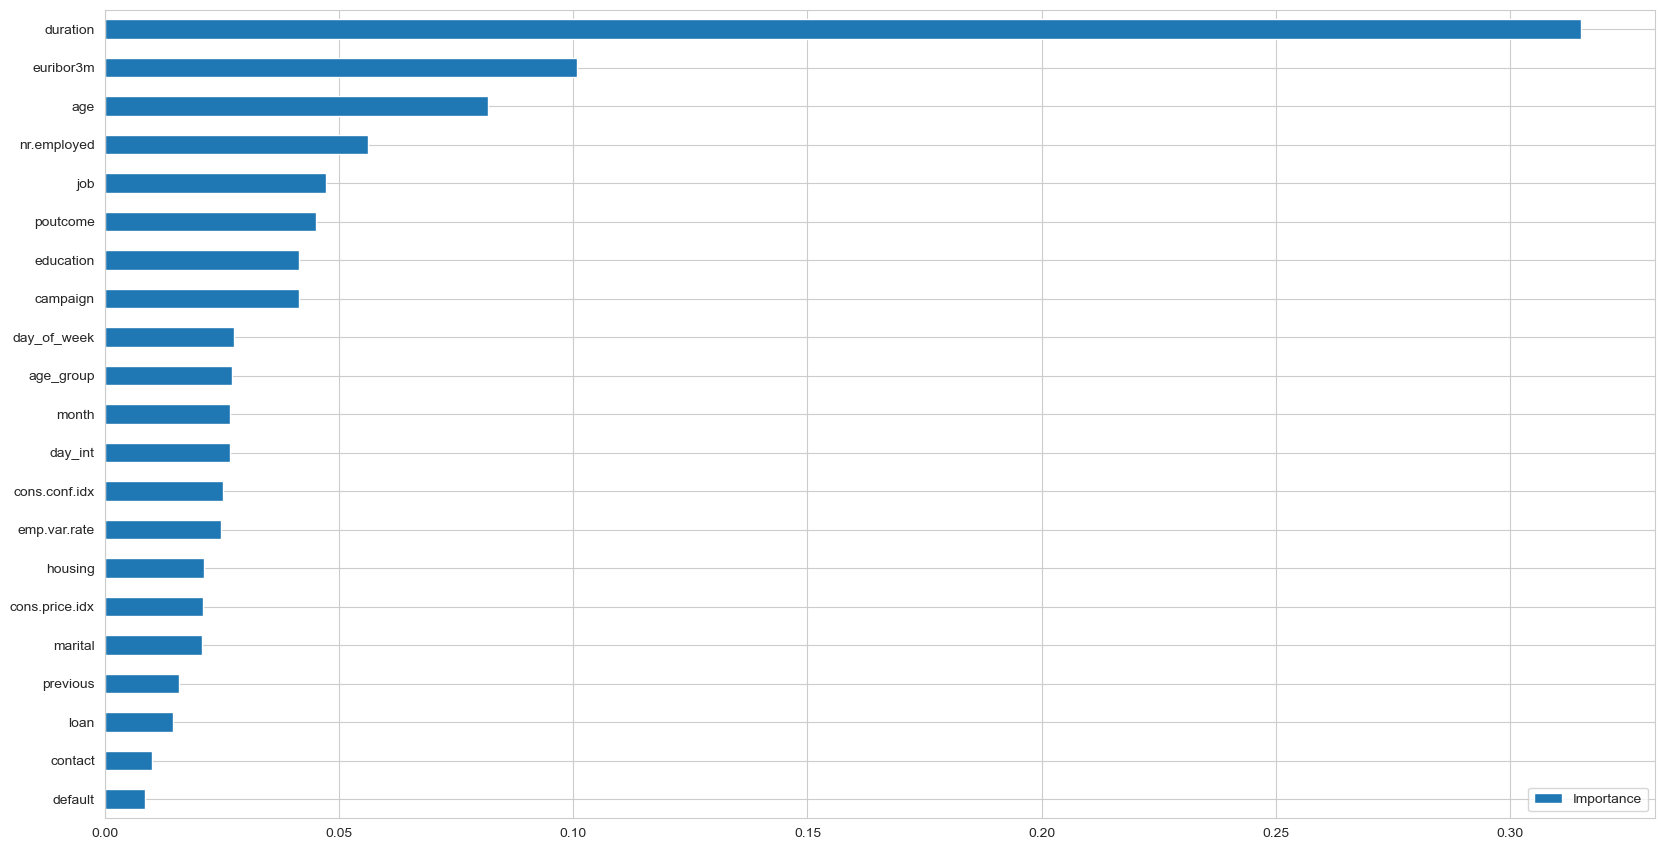

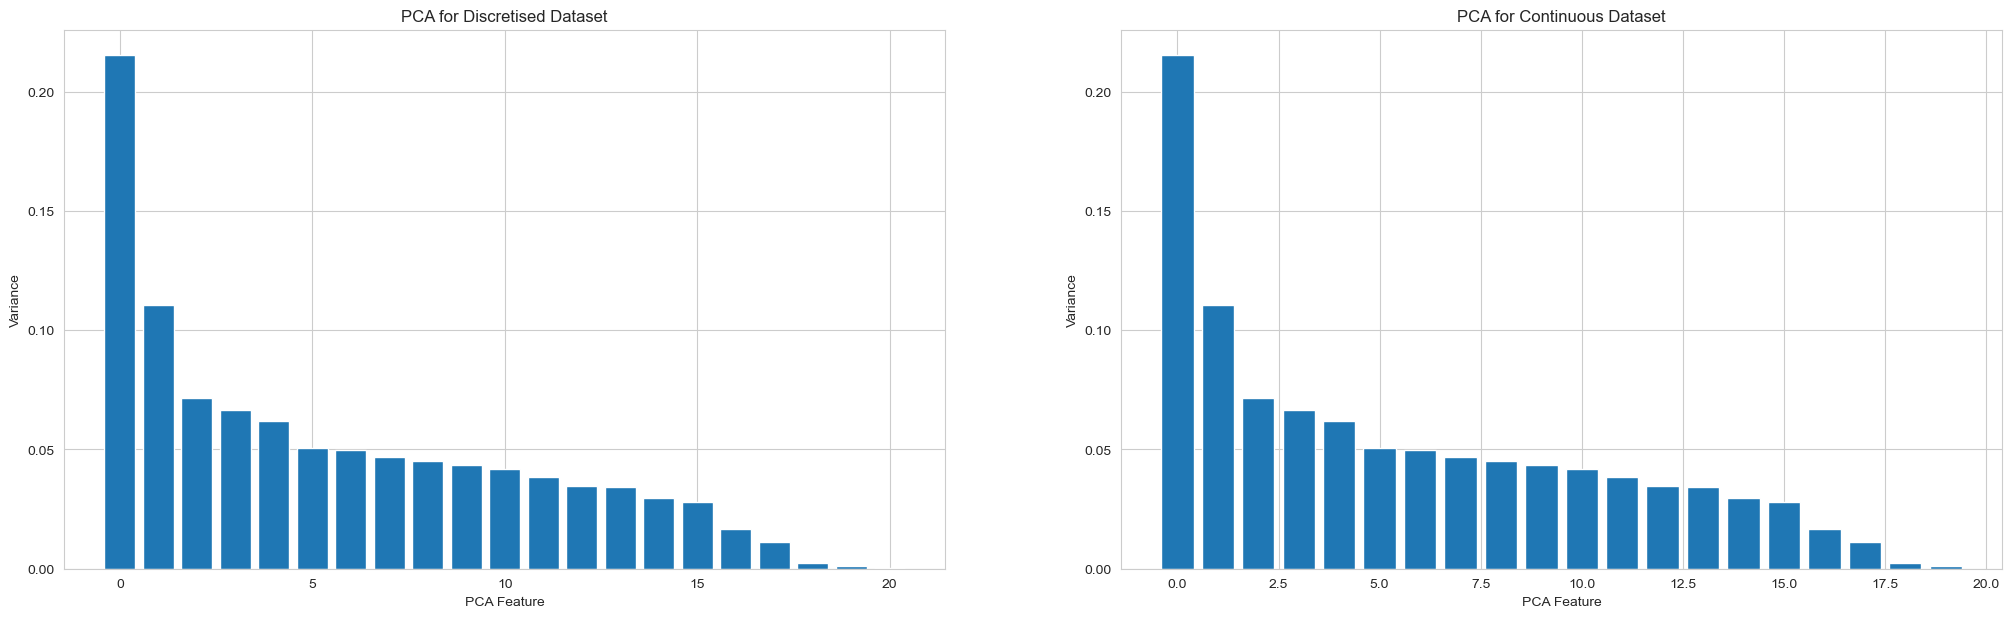

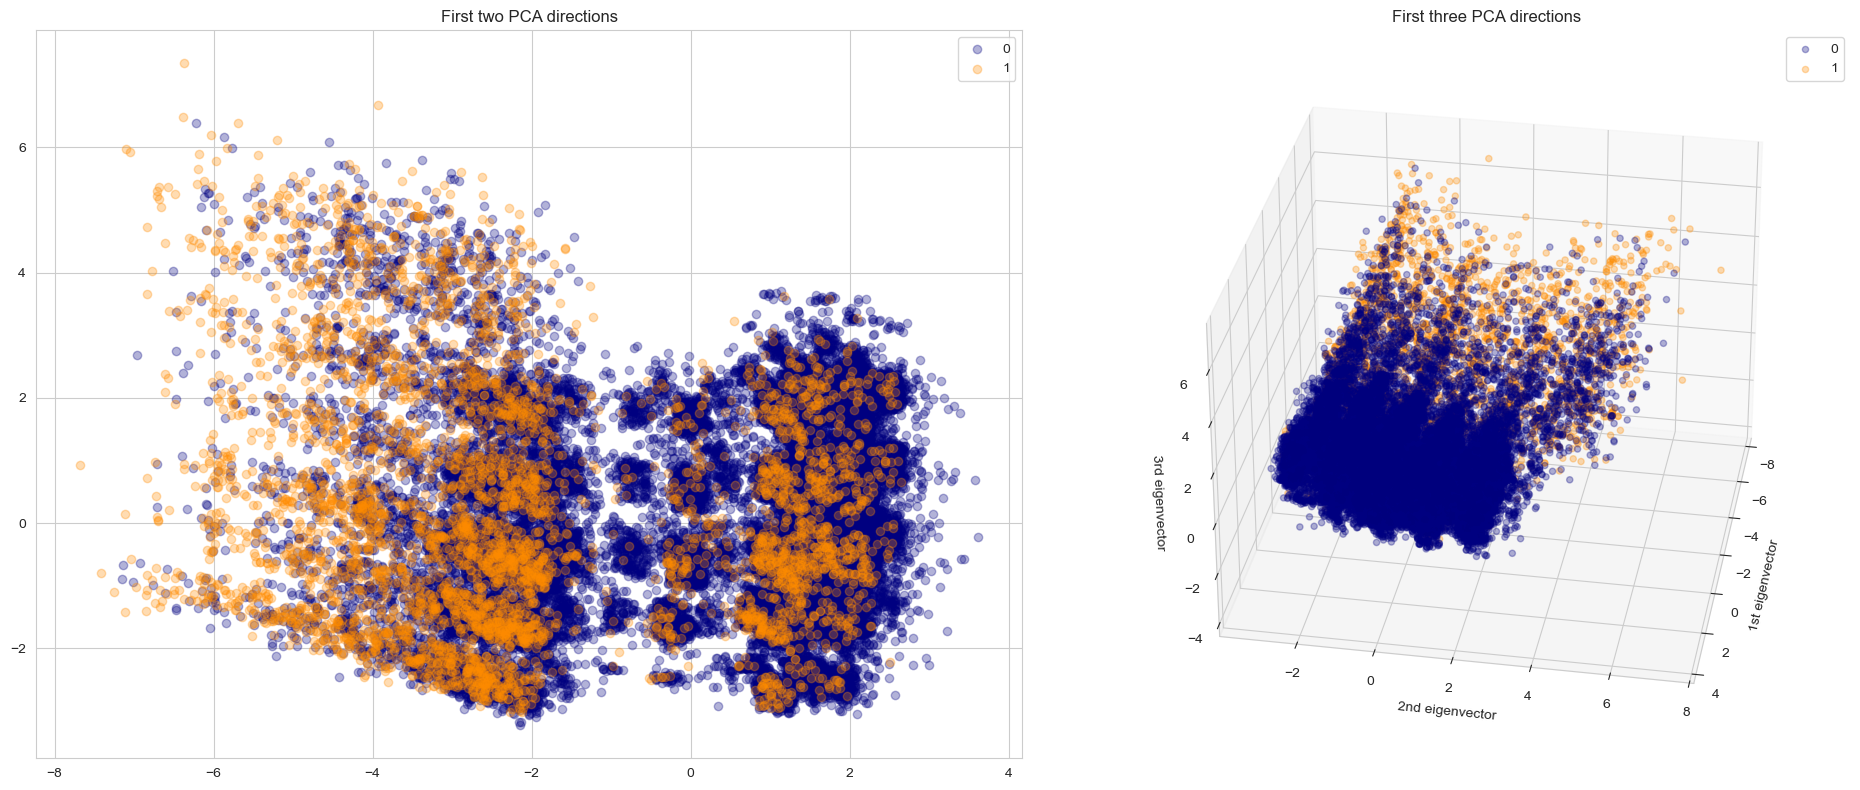

In [163]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D  # for 3d projection

# Assuming data_drop exists and has 'y' column with 0/1 values

# Scaling
std_scale = preprocessing.StandardScaler().fit(data_drop.drop('y', axis=1))
X = std_scale.transform(data_drop.drop('y', axis=1))
y = data_drop['y'].reset_index(drop=True)

colors = ['navy', 'darkorange']
target_names = [0, 1]
alpha = 0.3

sns.set_style("whitegrid")
fig = plt.figure(figsize=(20, 8))

# 2D PCA
plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=alpha, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First two PCA directions')

# 3D PCA
ax = fig.add_subplot(1, 2, 2, projection='3d')
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2],
               color=color, alpha=alpha, label=target_name)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")
ax.view_init(30, 10)
ax.legend(loc='best', shadow=False, scatterpoints=1)

plt.tight_layout()
plt.show()



In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from numpy import ravel

from sklearn.model_selection import train_test_split


print("X Train:", X_train.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y Test:", y_test.shape)

X Train: (32950, 21)
X Test: (8238, 21)
Y Train: (32950,)
Y Test: (8238,)


# Classification Algorithms
### Hyperparameter Tuning using Crossvalidation with GridSearchCV¶
# Logistic Regression

In [167]:
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [169]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
   

In [171]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l1','l2'],
             'solver':['lbfgs']}

In [173]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

In [175]:
logreg_cv=GridSearchCV(lr,parameters, cv=10)
logreg_cv.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.9098330804248862


In [177]:
y_test

35577    0
13950    0
29451    1
32295    0
27477    0
        ..
8337     0
29097    1
30687    0
33048    0
24024    1
Name: y, Length: 8238, dtype: int64

Accuracy of Logistic Regression on test data

In [180]:
print('Accuracy on test data is: {:.3f}'.format(logreg_cv.score(X_test, y_test)))

Accuracy on test data is: 0.911


In [182]:
yhat=logreg_cv.predict(X_test)

In [184]:

from sklearn.metrics import classification_report
print (metrics.classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7294
           1       0.68      0.42      0.52       944

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



# Support Vector Machine Classifier

In [186]:

svm = SVC()

In [188]:

svm.fit(X_train,y_train)

SVC()

##### Accuracy of SVM on the test data

In [190]:
print('Accuracy on test data is: {:.3f}'.format(svm.score(X_test, y_test)))

Accuracy on test data is: 0.912


In [192]:
ACC_SVM=svm.score(X_test, y_test)

In [194]:
yhat_svm=svm.predict(X_test)

In [196]:

print (metrics.classification_report(y_test, yhat_svm))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7294
           1       0.68      0.43      0.53       944

    accuracy                           0.91      8238
   macro avg       0.81      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



# Decision Tree Classifier

In [198]:

DT = DecisionTreeClassifier()

In [200]:

DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [202]:
print('Accuracy on test data is: {:.3f}'.format(DT.score(X_test, y_test)))

Accuracy on test data is: 0.889


In [204]:
AC_DT=DT.score(X_test, y_test)

In [206]:
yhat_tree = DT.predict(X_test)

In [208]:

print (metrics.classification_report(y_test, yhat_tree))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7294
           1       0.52      0.54      0.53       944

    accuracy                           0.89      8238
   macro avg       0.73      0.74      0.73      8238
weighted avg       0.89      0.89      0.89      8238



# K Nearest Neighbours Classification

In [ ]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [ ]:
knn_cv=GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train,y_train)


print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

In [ ]:
print('Accuracy on test data is: {:.3f}'.format(knn_cv.score(X_test, y_test)))

In [ ]:
yhat_knn = knn_cv.predict(X_test)

In [ ]:

print (metrics.classification_report(y_test, yhat_tree))

In [ ]:
algorithms

In [ ]:
algorithms = {'KNN':knn_cv.best_score_,'Tree':AC_DT,'LogisticRegression':logreg_cv.best_score_,'SVM':ACC_SVM,}
bestalgorithm = max(algorithms, key=algorithms.get)
print('Best Algorithm is',bestalgorithm,'with a score of',algorithms[bestalgorithm])

In [ ]:
score_df = pd.DataFrame.from_dict(algorithms, orient='index', columns=['Train Data Accuracy'])
score_df.sort_values(['Train Data Accuracy'], inplace=True,ascending=False)
score_df.head(6)

#  Accuracy

In [ ]:
score_df = score_df.reset_index()
score_df.rename(columns = {'index': 'Algorithm'}, inplace = True)
score_df.head(6)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# comparation

In [ ]:
fig = px.bar(score_df, x='Algorithm', y='Train Data Accuracy', hover_data=['Algorithm', 'Train Data Accuracy'], color='Algorithm')
fig.update_layout(title='Algorithm vs. Train Data Accuracy', xaxis_title='Algorithm', yaxis_title='Train Data Accuracy' )
fig.show()